In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime

In [ ]:
dataset1 = pd.read_csv('/content/data_hourly.csv')

In [ ]:
dataset1.head()

,ID,From,Date,Hour,Participation_Phase,Demand_kWh,Price_signal,Experiment_price_NOK_kWh,Temperature,Temperature24,Temperature48,Temperature72
0,Exp_43,2020-02-01T00:00:00Z,01-02-2020,1,Phase_1,0.348,NaN,NaN,7.6,6.1,5.0,4.4
1,Exp_43,2020-02-01T01:00:00Z,01-02-2020,2,Phase_1,0.589,NaN,NaN,8.2,6.2,5.1,4.4
2,Exp_43,2020-02-01T02:00:00Z,01-02-2020,3,Phase_1,0.358,NaN,NaN,8.4,6.3,5.3,4.5
3,Exp_43,2020-02-01T03:00:00Z,01-02-2020,4,Phase_1,0.582,NaN,NaN,8.4,6.4,5.4,4.5
4,Exp_43,2020-02-01T04:00:00Z,01-02-2020,5,Phase_1,0.364,NaN,NaN,8.2,6.5,5.5,4.6


In [ ]:
dataset1.shape

(1048575, 12)

In [ ]:
dataset1.drop(['Experiment_price_NOK_kWh', 'Price_signal'], axis=1, inplace=True)


In [ ]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ID                   1048575 non-null  object 
 1   From                 1048575 non-null  object 
 2   Date                 1048575 non-null  object 
 3   Hour                 1048575 non-null  int64  
 4   Participation_Phase  1048575 non-null  object 
 5   Demand_kWh           1048575 non-null  float64
 6   Temperature          1048575 non-null  float64
 7   Temperature24        1048575 non-null  float64
 8   Temperature48        1048575 non-null  float64
 9   Temperature72        1048575 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 80.0+ MB


In [ ]:
dataset1.describe()

,Hour,Demand_kWh,Temperature,Temperature24,Temperature48,Temperature72
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.249994e+01,2.505277e+00,3.146722e+00,3.142398e+00,3.118835e+00,3.102803e+00
std,6.922181e+00,1.884382e+00,3.018771e+00,2.519721e+00,2.271579e+00,2.070058e+00
min,1.000000e+00,0.000000e+00,-7.200000e+00,-4.200000e+00,-4.000000e+00,-3.100000e+00
25%,6.000000e+00,1.041000e+00,1.100000e+00,1.500000e+00,1.700000e+00,1.800000e+00
50%,1.200000e+01,2.189000e+00,3.500000e+00,3.600000e+00,3.400000e+00,3.300000e+00
75%,1.800000e+01,3.537000e+00,5.300000e+00,5.000000e+00,4.900000e+00,4.600000e+00
max,2.400000e+01,2.014700e+01,1.140000e+01,7.900000e+00,7.800000e+00,7.400000e+00


In [ ]:
dataset1.columns

Index(['ID', 'From', 'Date', 'Hour', 'Participation_Phase', 'Demand_kWh',
       'Temperature', 'Temperature24', 'Temperature48', 'Temperature72'],
      dtype='object')

In [ ]:
dataset1.isnull().sum() 
#


,0
ID,0
From,0
Date,0
Hour,0
Participation_Phase,0
Demand_kWh,0
Temperature,0
Temperature24,0
Temperature48,0
Temperature72,0


In [ ]:
def getValueCounts(dataset1, feature):
  print('For feature {}'.format(feature))
  print(dataset1[feature].value_counts())
  print()

In [ ]:
for feat in dataset1.columns:
  getValueCounts(dataset1, feat)

For feature ID
ID
Exp_43     1800
Exp_639    1800
Exp_223    1800
Exp_55     1800
Exp_644    1800
           ... 
Exp_54     1800
Exp_291    1800
Exp_31     1800
Exp_471    1800
Exp_417     975
Name: count, Length: 583, dtype: int64

For feature From
From
2020-02-01T00:00:00Z    583
2020-02-27T17:00:00Z    583
2020-02-27T19:00:00Z    583
2020-02-27T20:00:00Z    583
2020-02-27T21:00:00Z    583
                       ... 
2020-01-29T04:00:00Z    582
2020-01-29T05:00:00Z    582
2020-01-29T06:00:00Z    582
2020-01-29T07:00:00Z    582
2020-03-20T23:00:00Z    582
Name: count, Length: 1800, dtype: int64

For feature Date
Date
01-02-2020    13992
22-02-2020    13992
24-02-2020    13992
25-02-2020    13992
26-02-2020    13992
              ...  
29-01-2020    13968
30-01-2020    13968
31-01-2020    13968
01-03-2020    13968
20-03-2020    13968
Name: count, Length: 75, dtype: int64

For feature Hour
Hour
1     43691
9     43691
15    43691
14    43691
2     43691
12    43691
11    43691
10    43

In [ ]:
def getUniqueCount(dataset1, feature):
  print('{} : {}'.format(feature, dataset1[feature].nunique()))

In [ ]:
for feat in dataset1.columns:
  getUniqueCount(dataset1, feat)

ID : 583
From : 1800
Date : 75
Hour : 24
Participation_Phase : 1
Demand_kWh : 12195
Temperature : 170
Temperature24 : 121
Temperature48 : 119
Temperature72 : 106


In [ ]:
cat_features = ['ID', 'From', 'Participation_Phase', 'Date', 'Hour']


In [ ]:
cont_features = dataset1.drop(cat_features, axis=1).columns
cont_features

Index(['Demand_kWh', 'Temperature', 'Temperature24', 'Temperature48',
       'Temperature72'],
      dtype='object')

In [ ]:
dataset_cont = dataset1[cont_features]
dataset_cont.head()

,Demand_kWh,Temperature,Temperature24,Temperature48,Temperature72
0,0.348,7.6,6.1,5.0,4.4
1,0.589,8.2,6.2,5.1,4.4
2,0.358,8.4,6.3,5.3,4.5
3,0.582,8.4,6.4,5.4,4.5
4,0.364,8.2,6.5,5.5,4.6


In [ ]:
dataset_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Demand_kWh     1048575 non-null  float64
 1   Temperature    1048575 non-null  float64
 2   Temperature24  1048575 non-null  float64
 3   Temperature48  1048575 non-null  float64
 4   Temperature72  1048575 non-null  float64
dtypes: float64(5)
memory usage: 40.0 MB


<Axes: >

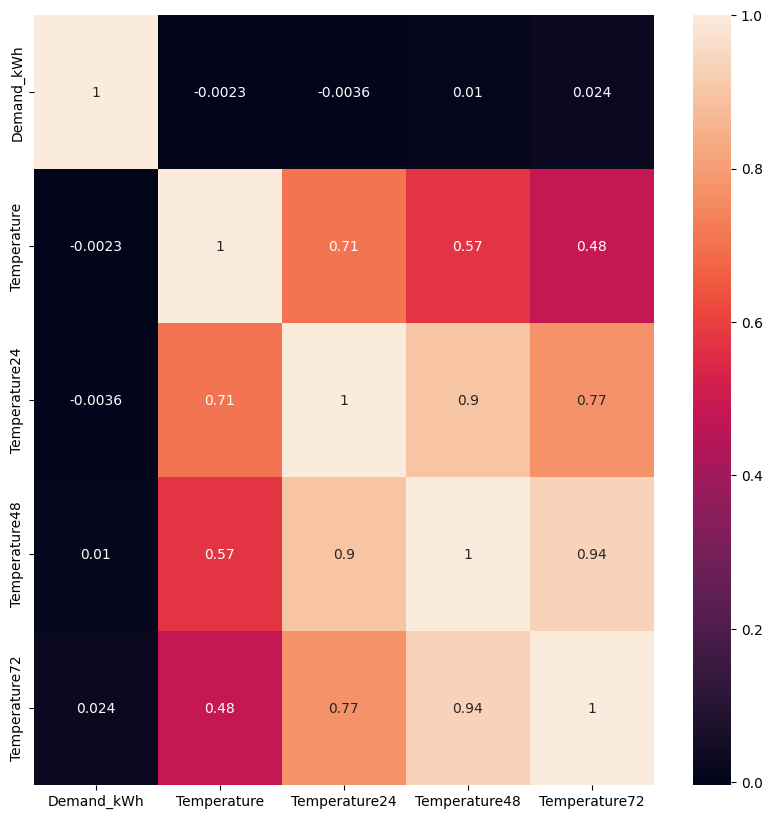

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset_cont.corr(), annot=True)



In [ ]:
corrFeatures = list()
for feat1 in dataset_cont.columns:
  for feat2 in dataset_cont.columns:
    X1 = dataset_cont[feat1]
    X2 = dataset_cont[feat2]
    if (X1.corr(X2)) >= .7 or X1.corr(X2) <= -.7:
      corrFeatures.append((feat1, feat2, X1.corr(X2)))

In [ ]:
corrFeatures

[('Demand_kWh', 'Demand_kWh', 1.0),
 ('Temperature', 'Temperature', 0.9999999999999999),
 ('Temperature', 'Temperature24', 0.7082485432263553),
 ('Temperature24', 'Temperature', 0.7082485432263553),
 ('Temperature24', 'Temperature24', 1.0),
 ('Temperature24', 'Temperature48', 0.8964545235278522),
 ('Temperature24', 'Temperature72', 0.7733674904280597),
 ('Temperature48', 'Temperature24', 0.8964545235278522),
 ('Temperature48', 'Temperature48', 0.9999999999999998),
 ('Temperature48', 'Temperature72', 0.935135668188944),
 ('Temperature72', 'Temperature24', 0.7733674904280597),
 ('Temperature72', 'Temperature48', 0.935135668188944),
 ('Temperature72', 'Temperature72', 0.9999999999999998)]

In [ ]:
selected_features = [feat for feat in dataset_cont.columns if feat == 'Temperature' or feat == 'Demand_kWh']


In [ ]:
selected_features

['Demand_kWh', 'Temperature']

In [ ]:
selected_dataset_cont = dataset_cont[selected_features]
def seeCorr():
  plt.figure(figsize= (5,5))
  sns.heatmap(selected_dataset_cont.corr(), annot=True)

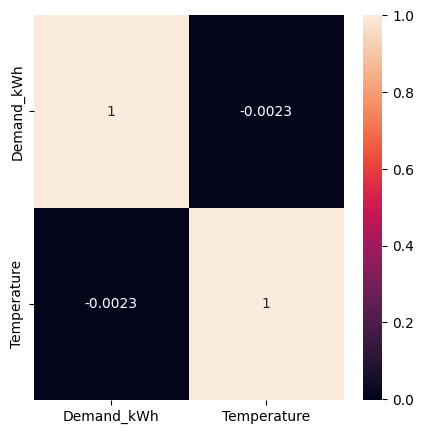

In [ ]:
seeCorr()

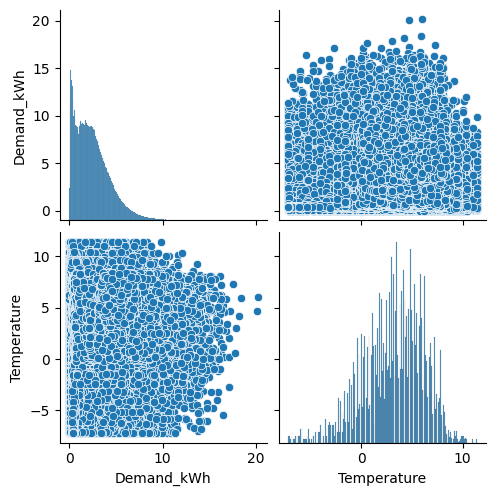

In [ ]:
sns.pairplot(selected_dataset_cont)

In [ ]:
from scipy.stats import anderson

# Function to apply the Anderson-Darling test
def isNormalAnderson(feature):
    # Perform the Anderson-Darling test
    result = anderson(selected_dataset_cont[feature])

    # Print the test statistic, critical values, and significance levels
    print(f'Anderson-Darling Test for {feature}:')
    print('Statistic: ', result.statistic)
    print('Critical Values: ', result.critical_values)
    print('Significance Levels: ', result.significance_level)

    # Compare statistic with critical values at different significance levels
    for i in range(len(result.critical_values)):
        if result.statistic < result.critical_values[i]:
            print(f'At the {result.significance_level[i]} significance level, the data is Normal')
        else:
            print(f'At the {result.significance_level[i]} significance level, the data is Not Normal')

# Apply the Anderson-Darling test on each selected feature
selected_features = ['Demand_kWh', 'Temperature']  # Modify this to include features of interest

# Apply the Anderson-Darling test on each selected feature
for feature in selected_features:
    isNormalAnderson(feature)



Anderson-Darling Test for Demand_kWh:
Statistic:  16361.38919459004
Critical Values:  [0.576 0.656 0.787 0.918 1.092]
Significance Levels:  [15.  10.   5.   2.5  1. ]
At the 15.0 significance level, the data is Not Normal
At the 10.0 significance level, the data is Not Normal
At the 5.0 significance level, the data is Not Normal
At the 2.5 significance level, the data is Not Normal
At the 1.0 significance level, the data is Not Normal
Anderson-Darling Test for Temperature:
Statistic:  4582.705061109969
Critical Values:  [0.576 0.656 0.787 0.918 1.092]
Significance Levels:  [15.  10.   5.   2.5  1. ]
At the 15.0 significance level, the data is Not Normal
At the 10.0 significance level, the data is Not Normal
At the 5.0 significance level, the data is Not Normal
At the 2.5 significance level, the data is Not Normal
At the 1.0 significance level, the data is Not Normal


In [ ]:
import numpy as np

# Function to find outliers based on normality of data
def find_outliers(dataset, feature):
    outliers = []
    mean = np.mean(dataset[feature])
    std = np.std(dataset[feature])
    q1, q3 = np.percentile(dataset[feature], [25, 75])
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    # For each data point in the feature
    for data_value in dataset[feature]:
        # Z-score calculation for normal distribution
        z_score = (data_value - mean) / std

        # If the feature is normally distributed

            # IQR-based outlier detection for non-normally distributed data
        if data_value < lower_bound or data_value > upper_bound:
                outliers.append(data_value)

    print(f"For the feature {feature}, there are {len(outliers)} outliers")
    return outliers

# Apply the outlier detection for selected features
selected_features = ['Demand_kWh', 'Temperature']  # Modify this to include features of interest

outliers_dict = {}

# Find outliers for each feature
for feature in selected_features:
    outliers = find_outliers(selected_dataset_cont, feature)
    outliers_dict[feature] = outliers


For the feature Demand_kWh, there are 22000 outliers
For the feature Temperature, there are 14256 outliers


In [ ]:
import numpy as np

# Function to remove outliers based on normality of data
def remove_outliers(dataset, feature):
    mean = np.mean(dataset[feature])
    std = np.std(dataset[feature])
    q1, q3 = np.percentile(dataset[feature], [25, 75])
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    # Create a mask to filter out the rows without outliers
     # Keep rows where Z-score is less than 3
    # If the feature is not normally distributed
    mask = (dataset[feature] >= lower_bound) & (dataset[feature] <= upper_bound)  # Keep rows within the IQR bounds

    # Apply the mask to remove the outliers
    cleaned_dataset = dataset[mask]
    print(f"Outliers removed for feature {feature}. The new dataset has {len(cleaned_dataset)} rows.")

    return cleaned_dataset

# Apply the function to remove outliers for selected features
selected_features = ['Demand_kWh', 'Temperature']

# Remove outliers for each feature
for feature in selected_features:
    selected_dataset_cont = remove_outliers(selected_dataset_cont, feature)


Outliers removed for feature Demand_kWh. The new dataset has 1026575 rows.
Outliers removed for feature Temperature. The new dataset has 1012755 rows.


In [ ]:
selected_features

['Demand_kWh', 'Temperature']

In [ ]:
cleaned_cont_dataset = selected_dataset_cont.copy()


In [ ]:
cleaned_cont_dataset.head()

,Demand_kWh,Temperature
0,0.348,7.6
1,0.589,8.2
2,0.358,8.4
3,0.582,8.4
4,0.364,8.2


In [ ]:
import numpy as np

# Calculate mean and standard deviation of original (unnormalized) data
mean_original = cleaned_cont_dataset.mean()  # Mean for each feature
std_original = cleaned_cont_dataset.std()    # Standard deviation for each feature

print("Mean of original data:\n", mean_original)
print("Standard deviation of original data:\n", std_original)

# Access specific feature statistics, e.g., 'Demand_kWh'
mean_demand = mean_original['Demand_kWh']
std_demand = std_original['Demand_kWh']

print(f"Mean of Demand_kWh: {mean_demand}")
print(f"Std of Demand_kWh: {std_demand}")

# Access specific feature statistics, e.g., 'Temperature'
mean_temp = mean_original['Temperature']
std_temp = std_original['Temperature']

print(f"Mean of Temperature: {mean_temp}")
print(f"Std of Temperature: {std_temp}")

Mean of original data:
 Demand_kWh     2.370872
Temperature    3.284153
dtype: float64
Standard deviation of original data:
 Demand_kWh     1.645784
Temperature    2.832973
dtype: float64
Mean of Demand_kWh: 2.3708721507175965
Std of Demand_kWh: 1.6457842088320167
Mean of Temperature: 3.284152830645123
Std of Temperature: 2.8329734039755667


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
ss= StandardScaler()

In [ ]:
cleaned_cont_dataset.isnull().sum()

,0
Demand_kWh,0
Temperature,0


In [ ]:
trainingDataFrame = ss.fit_transform(cleaned_cont_dataset)

In [ ]:
trainingDataFrame_df = pd.DataFrame(trainingDataFrame, columns=cleaned_cont_dataset.columns)


In [ ]:
print(trainingDataFrame_df.head())

   Demand_kWh  Temperature
0   -1.229124     1.523434
1   -1.082689     1.735226
2   -1.223048     1.805823
3   -1.086943     1.805823
4   -1.219402     1.735226


In [ ]:
trainingDataFrame_df.shape

(1012755, 2)

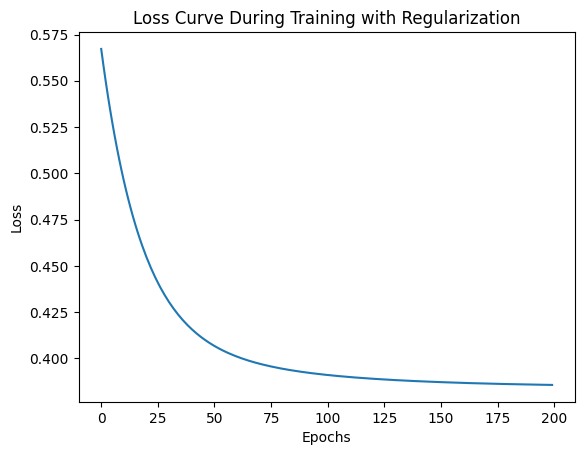

Training Set Evaluation: MSE: 0.3853, MAE: 0.5194, R2: -0.0021, MAPE: 252.4869%
Test Set Evaluation: MSE: 0.3938, MAE: 0.5297, R2: -0.0053, MAPE: 287.4242%


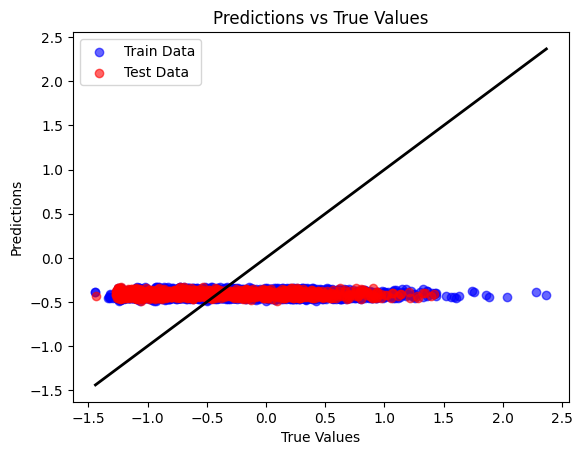

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming 'trainingDataFrame_df' is already normalized and contains 'Temperature' and 'Demand_kWh' columns

# Adjust the data frame to fit the model
X = trainingDataFrame_df['Temperature'].values[:5000].reshape(-1, 1)  # Use only the first 5000 samples
y = trainingDataFrame_df['Demand_kWh'].values[:5000]

# Train-test split (no normalization needed as data is already normalized)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize weights and bias (w is scalar for linear regression)
w = 0.0
b = 0.0

# Linear regression model
def model(X, w, b):
    return X * w + b

# Compute loss (Mean Squared Error)
def compute_loss(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

# Add L2 Regularization to the loss function
def compute_loss_with_reg(w, y_pred, y_true, lambda_reg=0.01):
    mse_loss = np.mean((y_pred - y_true) ** 2)
    reg_loss = lambda_reg * w**2  # L2 Regularization
    return mse_loss + reg_loss

# Gradient Descent Optimizer (with L2 Regularization)
def gradient_descent_optimizer(X, y, w, b, learning_rate, epochs, lambda_reg=0.01):
    loss_history = []
    for epoch in range(epochs):
        y_pred = model(X, w, b)
        loss = compute_loss_with_reg(w, y_pred, y, lambda_reg)
        loss_history.append(loss)

        # Compute gradients for weights and bias
        dw = -2 * np.mean((y - y_pred) * X) + 2 * lambda_reg * w  # Include gradient of L2 regularization
        db = -2 * np.mean(y - y_pred)

        w -= learning_rate * dw
        b -= learning_rate * db

        # Save model checkpoints after every 500 epochs
        if epoch % 500 == 0:
            np.save(f"weights_epoch_{epoch}.npy", w)
            np.save(f"bias_epoch_{epoch}.npy", b)

    return w, b, loss_history

# Hyperparameters
learning_rate = 0.01  # Increased learning rate for faster convergence
epochs = 200  # Increased epochs for better convergence
lambda_reg = 0.01  # L2 regularization term

# Train the model
w_trained, b_trained, loss_history = gradient_descent_optimizer(X_train, y_train, w, b, learning_rate, epochs, lambda_reg)

# Plot the loss curve for training
plt.plot(range(epochs), loss_history)
plt.title("Loss Curve During Training with Regularization")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Predictions for training and testing sets
y_pred_train = model(X_train, w_trained, b_trained)
y_pred_test = model(X_test, w_trained, b_trained)

# Evaluation metrics
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100  # Mean Absolute Percentage Error

mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100  # Test MAPE

# Displaying results
print(f"Training Set Evaluation: MSE: {mse_train:.4f}, MAE: {mae_train:.4f}, R2: {r2_train:.4f}, MAPE: {mape_train:.4f}%")
print(f"Test Set Evaluation: MSE: {mse_test:.4f}, MAE: {mae_test:.4f}, R2: {r2_test:.4f}, MAPE: {mape_test:.4f}%")

# Visualize predictions vs true values
plt.scatter(y_train, y_pred_train, color='blue', label='Train Data', alpha=0.6)
plt.scatter(y_test, y_pred_test, color='red', label='Test Data', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='black', linewidth=2)
plt.title("Predictions vs True Values")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.legend()
plt.show()



# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# # Assuming 'trainingDataFrame_df' is your DataFrame containing 'Temperature' and 'Demand_kWh' columns
# # Adjust the data frame to fit the model
# X = trainingDataFrame_df['Temperature'].values[:5000]  # Use only the first 5000 samples
# y = trainingDataFrame_df['Demand_kWh'].values[:5000]

# # Data Preprocessing: Normalize the temperature data using training data statistics
# X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size=0.2, random_state=42)

# # Calculate mean and std from the training data
# mean_X = np.mean(X_train)
# std_X = np.std(X_train)

# # Normalize the training data using the training data statistics
# X_train_normalized = (X_train - mean_X) / std_X

# # Normalize the test data using the same mean and std from training data
# X_test_normalized = (X_test - mean_X) / std_X

# # Initialize weights and bias (w is scalar for linear regression)
# w = 0.0
# b = 0.0

# # Linear regression model
# def model(X, w, b):
#     return X * w + b  # X is already normalized

# # Compute loss (Mean Squared Error)
# def compute_loss(y_pred, y_true):
#     return np.mean((y_pred - y_true) ** 2)

# # Add L2 Regularization to the loss function
# def compute_loss_with_reg(w, y_pred, y_true, lambda_reg=0.01):
#     mse_loss = np.mean((y_pred - y_true) ** 2)
#     reg_loss = lambda_reg * w**2  # L2 Regularization
#     return mse_loss + reg_loss

# # Gradient Descent Optimizer (with L2 Regularization)
# def gradient_descent_optimizer(X, y, w, b, learning_rate, epochs, lambda_reg=0.01):
#     loss_history = []
#     for epoch in range(epochs):
#         y_pred = model(X, w, b)
#         loss = compute_loss_with_reg(w, y_pred, y, lambda_reg)
#         loss_history.append(loss)

#         # Compute gradients for weights and bias
#         dw = -2 * np.mean((y - y_pred) * X) + 2 * lambda_reg * w  # Include gradient of L2 regularization
#         db = -2 * np.mean(y - y_pred)

#         w -= learning_rate * dw
#         b -= learning_rate * db

#         # Save model checkpoints after every 500 epochs
#         if epoch % 500 == 0:
#             np.save(f"weights_epoch_{epoch}.npy", w)
#             np.save(f"bias_epoch_{epoch}.npy", b)

#     return w, b, loss_history

# # Hyperparameters
# learning_rate = 0.01  # Increased learning rate for faster convergence
# epochs = 200  # Increased epochs for better convergence
# lambda_reg = 0.01  # L2 regularization term

# # Train the model
# w_trained, b_trained, loss_history = gradient_descent_optimizer(X_train_normalized, y_train, w, b, learning_rate, epochs, lambda_reg)

# # Plot the loss curve for training
# plt.plot(range(epochs), loss_history)
# plt.title("Loss Curve During Training with Regularization")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.show()

# # Predictions for training and testing sets
# y_pred_train = model(X_train_normalized, w_trained, b_trained)
# y_pred_test = model(X_test_normalized, w_trained, b_trained)

# # Evaluation metrics
# mse_train = mean_squared_error(y_train, y_pred_train)
# mae_train = mean_absolute_error(y_train, y_pred_train)
# r2_train = r2_score(y_train, y_pred_train)
# mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100  # Mean Absolute Percentage Error

# mse_test = mean_squared_error(y_test, y_pred_test)
# mae_test = mean_absolute_error(y_test, y_pred_test)
# r2_test = r2_score(y_test, y_pred_test)
# mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100  # Test MAPE

# # Displaying results
# print(f"Training Set Evaluation: MSE: {mse_train:.4f}, MAE: {mae_train:.4f}, R2: {r2_train:.4f}, MAPE: {mape_train:.4f}%")
# print(f"Test Set Evaluation: MSE: {mse_test:.4f}, MAE: {mae_test:.4f}, R2: {r2_test:.4f}, MAPE: {mape_test:.4f}%")

# # Visualize predictions vs true values
# plt.scatter(y_train, y_pred_train, color='blue', label='Train Data', alpha=0.6)
# plt.scatter(y_test, y_pred_test, color='red', label='Test Data', alpha=0.6)
# plt.plot([y.min(), y.max()], [y.min(), y.max()], color='black', linewidth=2)
# plt.title("Predictions vs True Values")
# plt.xlabel("True Values")
# plt.ylabel("Predictions")
# plt.legend()
# plt.show()



In [ ]:
mean_y = np.mean(y_train)
std_y = np.std(y_train)
print(f"mean_y: {mean_y}, std_y: {std_y}")


mean_y: -0.4275115439236674, std_y: 0.6200404569890869


In [ ]:
print(f"y_train Mean: {np.mean(y_train)}, Std Dev: {np.std(y_train)}")


y_train Mean: -0.4275115439236674, Std Dev: 0.6200404569890869


In [ ]:
print(f"Normalized Preds (Train): {y_pred_train[:5]}")


Normalized Preds (Train): [[-0.33814496]
 [-0.42610894]
 [-0.34512623]
 [-0.37444755]
 [-0.38841009]]


In [ ]:
print(f"Manually De-normalized (Train): {y_pred_train[:5] * std_y + mean_y}")


Manually De-normalized (Train): [[-0.6371751 ]
 [-0.69171632]
 [-0.64150377]
 [-0.65968418]
 [-0.66834151]]


Predicted energy consumption for 7.4°C temperature: 1.6305 kWh
Training Set Evaluation: MSE: 0.3853, MAE: 0.5194, R2: -0.0021, MAPE: 252.4869%
Test Set Evaluation: MSE: 0.3938, MAE: 0.5297, R2: -0.0053, MAPE: 287.4242%


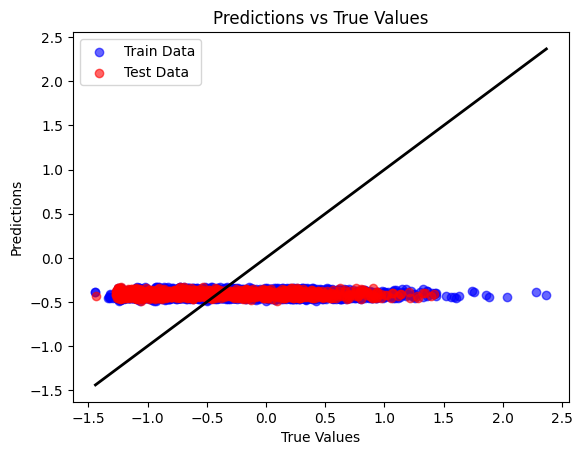

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming 'trainingDataFrame_df' is a normalized DataFrame containing 'Temperature' and 'Demand_kWh' columns

# Calculate mean and standard deviation of original (unnormalized) data
mean_original = cleaned_cont_dataset.mean()  # Mean for each feature
std_original = cleaned_cont_dataset.std()    # Standard deviation for each feature

# print("Mean of original data:\n", mean_original)
# print("Standard deviation of original data:\n", std_original)

# Access specific feature statistics, e.g., 'Demand_kWh'
mean_demand = mean_original['Demand_kWh']
std_demand = std_original['Demand_kWh']

# print(f"Mean of Demand_kWh: {mean_demand}")
# print(f"Std of Demand_kWh: {std_demand}")

# Access specific feature statistics, e.g., 'Temperature'
mean_temp = mean_original['Temperature']
std_temp = std_original['Temperature']

# print(f"Mean of Temperature: {mean_temp}")
# print(f"Std of Temperature: {std_temp}")

# Use normalized data for modeling
X = trainingDataFrame_df['Temperature'].values[:5000]  # Normalized Temperature
y = trainingDataFrame_df['Demand_kWh'].values[:5000]    # Normalized Demand

# Step 2: Split data for training
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size=0.2, random_state=42)

# Step 3: Model training (assume w_trained and b_trained are already trained)

# Function to predict energy consumption for a new temperature input
def predict_energy(temperature):
    # Denormalize the input temperature using the original mean and std of unnormalized data
    normalized_temp = (temperature - mean_temp) / std_temp
    predicted_energy = model(np.array([[normalized_temp]]), w_trained, b_trained)
    return predicted_energy[0][0]  # Return the scalar value

# Test prediction for a new temperature input
new_temperature = 7.4  # Example temperature input (normalized)
predicted_energy = predict_energy(new_temperature) * std_demand + mean_demand

print(f"Predicted energy consumption for {new_temperature}°C temperature: {predicted_energy:.4f} kWh")

# Predictions for the training and test sets using the trained model
y_pred_train = model(X_train, w_trained, b_trained)  # Use X_train directly (already normalized)
y_pred_test = model(X_test, w_trained, b_trained)    # Use X_test directly (already normalized)

# Evaluate performance on the training set
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100  # Mean Absolute Percentage Error

# Evaluate performance on the test set
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100  # Test MAPE

# Displaying results
print(f"Training Set Evaluation: MSE: {mse_train:.4f}, MAE: {mae_train:.4f}, R2: {r2_train:.4f}, MAPE: {mape_train:.4f}%")
print(f"Test Set Evaluation: MSE: {mse_test:.4f}, MAE: {mae_test:.4f}, R2: {r2_test:.4f}, MAPE: {mape_test:.4f}%")

# Visualize predictions vs true values for both training and test sets
plt.scatter(y_train, y_pred_train, color='blue', label='Train Data', alpha=0.6)
plt.scatter(y_test, y_pred_test, color='red', label='Test Data', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='black', linewidth=2)
plt.title("Predictions vs True Values")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.legend()
plt.show()



# # Assuming the model has already been trained and the weights and bias are available
# # We will use the trained weights (w_trained) and bias (b_trained) from the model

# # Function to predict energy consumption for a new temperature input
# # Function to predict energy consumption for a new temperature input
# def predict_energy(temperature):
#     # Normalize the input temperature using training data statistics
#     normalized_temp = (temperature - mean_X) / std_X
#     predicted_energy = model(np.array([[normalized_temp]]), w_trained, b_trained)
#     return predicted_energy[0][0]  # Return the scalar value (first element of the array)



# # Test prediction for a new temperature input
# new_temperature = 8  # Example temperature input
# predicted_energy = predict_energy(new_temperature)

# print(f"Predicted energy consumption for {new_temperature  }°C temperature: {predicted_energy:.4f} kWh")

# # Predictions for the training and test sets using the trained model
# y_pred_train = model(X_train_normalized, w_trained, b_trained)
# y_pred_test = model(X_test_normalized, w_trained, b_trained)

# # Evaluate performance on the training set
# mse_train = mean_squared_error(y_train, y_pred_train)
# mae_train = mean_absolute_error(y_train, y_pred_train)
# r2_train = r2_score(y_train, y_pred_train)
# mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100  # Mean Absolute Percentage Error

# # Evaluate performance on the test set
# mse_test = mean_squared_error(y_test, y_pred_test)
# mae_test = mean_absolute_error(y_test, y_pred_test)
# r2_test = r2_score(y_test, y_pred_test)
# mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100  # Test MAPE

# # Displaying results
# print(f"Training Set Evaluation: MSE: {mse_train:.4f}, MAE: {mae_train:.4f}, R2: {r2_train:.4f}, MAPE: {mape_train:.4f}%")
# print(f"Test Set Evaluation: MSE: {mse_test:.4f}, MAE: {mae_test:.4f}, R2: {r2_test:.4f}, MAPE: {mape_test:.4f}%")

# # Visualize predictions vs true values for both training and test sets
# plt.scatter(y_train, y_pred_train, color='blue', label='Train Data', alpha=0.6)
# plt.scatter(y_test, y_pred_test, color='red', label='Test Data', alpha=0.6)
# plt.title("Predictions vs True Values")
# plt.xlabel("True Values")
# plt.ylabel("Predictions")
# plt.legend()
# plt.show()


Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4491 - val_loss: 0.3910
Epoch 2/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3877 - val_loss: 0.3919
Epoch 3/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3928 - val_loss: 0.3919
Epoch 4/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3975 - val_loss: 0.3938
Epoch 5/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3851 - val_loss: 0.3918
Epoch 6/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3716 - val_loss: 0.3918
Epoch 7/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3847 - val_loss: 0.3934
Epoch 8/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3739 - val_loss: 0.3921
Epoch 9/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3885 - val_loss: 0.3935
Epoch 10/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3858 - val_loss: 0.3925
Epoch 11/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3946 - val_loss: 0.3915
Epoch 12/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

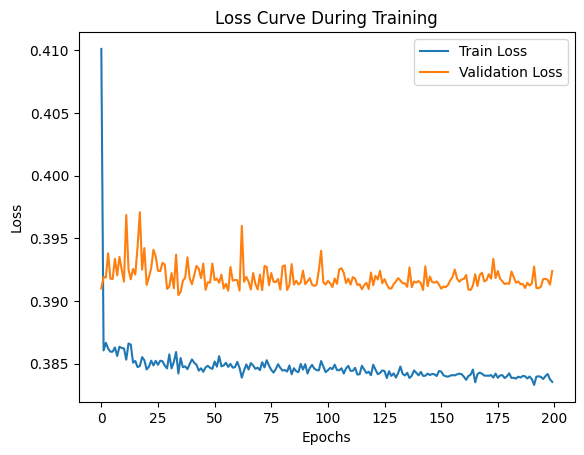

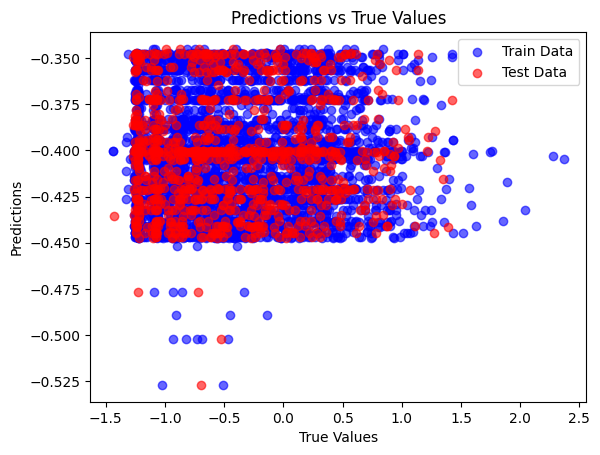

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted energy consumption for 25.0°C temperature: 1.0973 kWh


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Assuming 'trainingDataFrame_df' is your DataFrame containing 'Temperature' and 'Demand_kWh' columns
# Adjust the data frame to fit the model
X = trainingDataFrame_df['Temperature'].values[:5000]  # Use only the first 5000 samples
y = trainingDataFrame_df['Demand_kWh'].values[:5000]

# Since the data is already normalized, no need for re-normalization
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size=0.2, random_state=42)

# Neural Network Model
model = Sequential([
    Dense(64, input_dim=1, activation='relu'),  # First hidden layer
    Dense(32, activation='relu'),              # Second hidden layer
    Dense(1)                                   # Output layer (single value for regression)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the training and test data
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)

# Predict the energy consumption for training and test data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluation metrics
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Displaying results
print(f"Training Set Evaluation: MSE: {mse_train:.4f}, MAE: {mae_train:.4f}, R2: {r2_train:.4f}")
print(f"Test Set Evaluation: MSE: {mse_test:.4f}, MAE: {mae_test:.4f}, R2: {r2_test:.4f}")

# Plot the loss curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve During Training")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Visualize predictions vs true values
plt.scatter(y_train, y_pred_train, color='blue', label='Train Data', alpha=0.6)
plt.scatter(y_test, y_pred_test, color='red', label='Test Data', alpha=0.6)
plt.title("Predictions vs True Values")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.legend()
plt.show()

# Now, to make a prediction for a new temperature input (example: 25°C)
new_temperature = 8.2  # Example temperature input (actual value)
# Normalize the input temperature using the training set's mean and std (from training data)
new_temperature_normalized = (new_temperature - mean_temp) / std_temp  # Only normalize input for prediction

# Make prediction
predicted_energy = model.predict(np.array([[new_temperature]])) * std_demand + mean_demand
print(f"Predicted energy consumption for {new_temperature}°C temperature: {predicted_energy[0][0]:.4f} kWh")




# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.optimizers import Adam

# # Assuming 'trainingDataFrame_df' is your DataFrame containing 'Temperature' and 'Demand_kWh' columns
# # Adjust the data frame to fit the model
# X = trainingDataFrame_df['Temperature'].values[:5000]  # Use only the first 5000 samples
# y = trainingDataFrame_df['Demand_kWh'].values[:5000]

# # Data Preprocessing: Normalize the temperature data using training data statistics
# X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size=0.2, random_state=42)

# # Calculate mean and std from the training data
# mean_X = np.mean(X_train)
# std_X = np.std(X_train)

# # Normalize the training data using the training data statistics
# X_train_normalized = (X_train - mean_X) / std_X

# # Normalize the test data using the same mean and std from training data
# X_test_normalized = (X_test - mean_X) / std_X

# # Neural Network Model
# model = Sequential([
#     Dense(64, input_dim=1, activation='relu'),  # First hidden layer
#     Dense(32, activation='relu'),              # Second hidden layer
#     Dense(1)                                   # Output layer (single value for regression)
# ])

# # Compile the model
# model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# # Train the model
# history = model.fit(X_train_normalized, y_train, epochs=200, batch_size=32, validation_data=(X_test_normalized, y_test))

# # Evaluate the model on the training and test data
# train_loss = model.evaluate(X_train_normalized, y_train)
# test_loss = model.evaluate(X_test_normalized, y_test)

# # Predict the energy consumption for training and test data
# y_pred_train = model.predict(X_train_normalized)
# y_pred_test = model.predict(X_test_normalized)

# # Evaluation metrics
# mse_train = mean_squared_error(y_train, y_pred_train)
# mae_train = mean_absolute_error(y_train, y_pred_train)
# r2_train = r2_score(y_train, y_pred_train)

# mse_test = mean_squared_error(y_test, y_pred_test)
# mae_test = mean_absolute_error(y_test, y_pred_test)
# r2_test = r2_score(y_test, y_pred_test)

# # Displaying results
# print(f"Training Set Evaluation: MSE: {mse_train:.4f}, MAE: {mae_train:.4f}, R2: {r2_train:.4f}")
# print(f"Test Set Evaluation: MSE: {mse_test:.4f}, MAE: {mae_test:.4f}, R2: {r2_test:.4f}")

# # Plot the loss curve
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title("Loss Curve During Training")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.legend()
# plt.show()

# # Visualize predictions vs true values
# plt.scatter(y_train, y_pred_train, color='blue', label='Train Data', alpha=0.6)
# plt.scatter(y_test, y_pred_test, color='red', label='Test Data', alpha=0.6)
# plt.title("Predictions vs True Values")
# plt.xlabel("True Values")
# plt.ylabel("Predictions")
# plt.legend()
# plt.show()

# # Now, to make a prediction for a new temperature input (example: 25°C)
# new_temperature = 25.0  # Example temperature input
# new_temperature_normalized = (new_temperature - mean_X) / std_X  # Normalize based on training data stats

# # Make prediction
# predicted_energy = model.predict(np.array([[new_temperature_normalized]]))
# print(f"Predicted energy consumption for {new_temperature}°C temperature: {predicted_energy[0][0]:.4f} kWh")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4501 - val_loss: 0.3936
Epoch 2/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3969 - val_loss: 0.3920
Epoch 3/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3842 - val_loss: 0.3915
Epoch 4/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3827 - val_loss: 0.3919
Epoch 5/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3908 - val_loss: 0.3926
Epoch 6/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3784 - val_loss: 0.3911
Epoch 7/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3824 - val_loss: 0.3971
Epoch 8/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3749 - val_loss: 0.3962
Epoch 9/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3846 - val_loss: 0.3927
Epoch 10/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3939 - val_loss: 0.3925
Epoch 11/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3786 - val_loss: 0.3926
Epoch 12/200
125/125 ━━━━━━━━━━━━━━━━━━━━

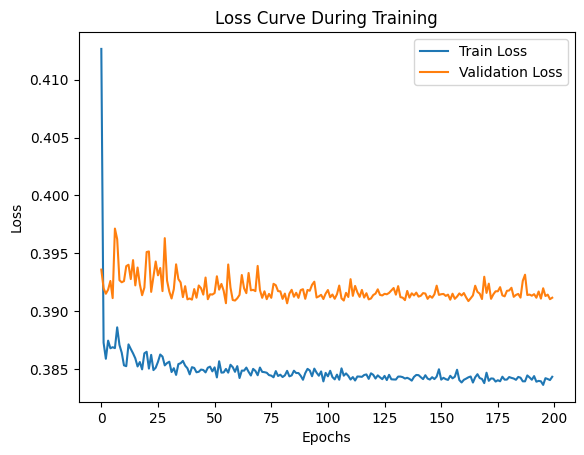

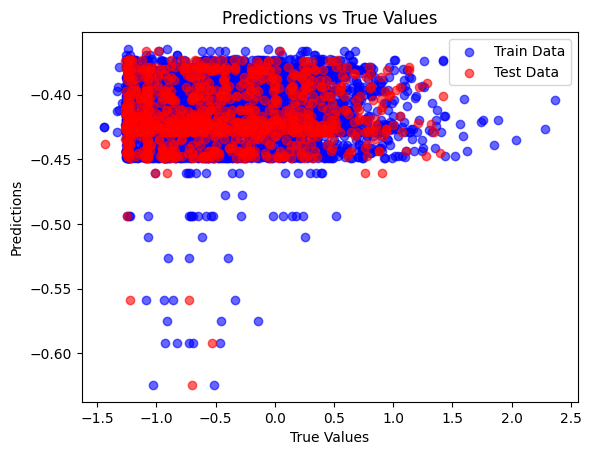

Enter the temperature in °C: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted energy consumption for 7.0°C temperature: 0.7274 kWh


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Assuming 'trainingDataFrame_df' is your DataFrame containing 'Temperature' and 'Demand_kWh' columns
# Adjust the data frame to fit the model
X = trainingDataFrame_df['Temperature'].values[:5000]  # Use only the first 5000 samples
y = trainingDataFrame_df['Demand_kWh'].values[:5000]

# Since the data is already normalized, we skip normalization here
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size=0.2, random_state=42)

# Neural Network Model
model = Sequential([
    Dense(64, input_dim=1, activation='relu'),  # First hidden layer
    Dense(32, activation='relu'),              # Second hidden layer
    Dense(1)                                   # Output layer (single value for regression)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the training and test data
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)

# Predict the energy consumption for training and test data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluation metrics
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Displaying results
print(f"Training Set Evaluation: MSE: {mse_train:.4f}, MAE: {mae_train:.4f}, R2: {r2_train:.4f}")
print(f"Test Set Evaluation: MSE: {mse_test:.4f}, MAE: {mae_test:.4f}, R2: {r2_test:.4f}")

# Plot the loss curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve During Training")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Visualize predictions vs true values
plt.scatter(y_train, y_pred_train, color='blue', label='Train Data', alpha=0.6)
plt.scatter(y_test, y_pred_test, color='red', label='Test Data', alpha=0.6)
plt.title("Predictions vs True Values")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.legend()
plt.show()




# Get temperature input from the user
user_input_temperature = float(input("Enter the temperature in °C: "))

# Since the data is already normalized, we skip normalization for training/test sets.
# We still need to normalize the user input temperature based on training data stats
# mean_X = np.mean(X_train)
# std_X = np.std(X_train)

user_input_temperature_normalized = (user_input_temperature - mean_temp) / std_temp # Normalize based on training data stats

# Make prediction for the user's input temperature
predicted_energy = model.predict(np.array([[user_input_temperature]])) * std_demand + mean_demand
print(f"Predicted energy consumption for {user_input_temperature}°C temperature: {predicted_energy[0][0]:.4f} kWh")



# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.optimizers import Adam

# # Assuming 'trainingDataFrame_df' is your DataFrame containing 'Temperature' and 'Demand_kWh' columns
# # Adjust the data frame to fit the model
# X = trainingDataFrame_df['Temperature'].values[:5000]  # Use only the first 5000 samples
# y = trainingDataFrame_df['Demand_kWh'].values[:5000]

# # Data Preprocessing: Normalize the temperature data using training data statistics
# X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size=0.2, random_state=42)

# # Calculate mean and std from the training data
# mean_X = np.mean(X_train)
# std_X = np.std(X_train)

# # Normalize the training data using the training data statistics
# X_train_normalized = (X_train - mean_X) / std_X

# # Normalize the test data using the same mean and std from training data
# X_test_normalized = (X_test - mean_X) / std_X

# # Neural Network Model
# model = Sequential([
#     Dense(64, input_dim=1, activation='relu'),  # First hidden layer
#     Dense(32, activation='relu'),              # Second hidden layer
#     Dense(1)                                   # Output layer (single value for regression)
# ])

# # Compile the model
# model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# # Train the model
# history = model.fit(X_train_normalized, y_train, epochs=200, batch_size=32, validation_data=(X_test_normalized, y_test))

# # Evaluate the model on the training and test data
# train_loss = model.evaluate(X_train_normalized, y_train)
# test_loss = model.evaluate(X_test_normalized, y_test)

# # Predict the energy consumption for training and test data
# y_pred_train = model.predict(X_train_normalized)
# y_pred_test = model.predict(X_test_normalized)

# # Evaluation metrics
# mse_train = mean_squared_error(y_train, y_pred_train)
# mae_train = mean_absolute_error(y_train, y_pred_train)
# r2_train = r2_score(y_train, y_pred_train)

# mse_test = mean_squared_error(y_test, y_pred_test)
# mae_test = mean_absolute_error(y_test, y_pred_test)
# r2_test = r2_score(y_test, y_pred_test)

# # Displaying results
# print(f"Training Set Evaluation: MSE: {mse_train:.4f}, MAE: {mae_train:.4f}, R2: {r2_train:.4f}")
# print(f"Test Set Evaluation: MSE: {mse_test:.4f}, MAE: {mae_test:.4f}, R2: {r2_test:.4f}")

# # Plot the loss curve
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title("Loss Curve During Training")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.legend()
# plt.show()

# # Visualize predictions vs true values
# plt.scatter(y_train, y_pred_train, color='blue', label='Train Data', alpha=0.6)
# plt.scatter(y_test, y_pred_test, color='red', label='Test Data', alpha=0.6)
# plt.plot([y.min(), y.max()], [y.min(), y.max()], color='black', linewidth=2)
# plt.title("Predictions vs True Values")
# plt.xlabel("True Values")
# plt.ylabel("Predictions")
# plt.legend()
# plt.show()

# # Get temperature input from the user
# user_input_temperature = float(input("Enter the temperature in °C: "))

# # Normalize the input temperature based on training data stats
# user_input_temperature_normalized = (user_input_temperature - mean_X) / std_X  # Normalize based on training data stats

# # Make prediction
# predicted_energy = model.predict(np.array([[user_input_temperature_normalized]]))
# print(f"Predicted energy consumption for {user_input_temperature}°C temperature: {predicted_energy[0][0]:.4f} kWh")
